In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../Datasets/combined_Selected_Data.csv')

In [3]:
df.head()

,Date,Responsible Person,Session / Year,Status,Application Code,Country,State,Interested Course,Source,Source Category,Agent,Admission Under
0,09-Jan-2024,Madona Chowdhury,2023,Admitted,2023/316048,India,West Bengal,PhD in Science (Computer Science),Internal Staff,Internal Source,NaN,Srimanta Ghosh Grp [23]
1,06-Jan-2024,Madona Chowdhury,2023,Admitted,2023/315234,India,West Bengal,PhD in Law,Internal Staff,Internal Source,NaN,Srimanta Ghosh Grp [23]
2,06-Jan-2024,Madona Chowdhury,2023,Admitted,2023/315237,India,West Bengal,PhD in Law,Internal Staff,Internal Source,NaN,Srimanta Ghosh Grp [23]
3,04-Jan-2024,Madona Chowdhury,2023,Admitted,2023/315047,India,West Bengal,PhD in Engineering (Electronics & Communicatio...,Internal Staff,Internal Source,NaN,Srimanta Ghosh Grp [23]
4,02-Jan-2024,Madona Chowdhury,2023,Admitted,2023/316976,India,West Bengal,PhD in Engineering (Electronics & Communicatio...,Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh Grp [23]


In [4]:
df.tail()

,Date,Responsible Person,Session / Year,Status,Application Code,Country,State,Interested Course,Source,Source Category,Agent,Admission Under
17383,06-Dec-2023,Madhurima Bose,2024,Admitted,2024/316439,India,West Bengal,B.Sc. in Operation Theatre Technology,Personal reference,Reference,NaN,Kalyan Ghoshal Grp [24]
17384,06-Dec-2023,Debashree Choubey,2024,Dropout,2024/314975,India,West Bengal,Bachelor of Optometry,Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh Grp [24]
17385,06-Dec-2023,Debashree Choubey,2024,Admitted,2024/313095,Bangladesh,Bangladesh,BBA (H),Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh Grp [24]
17386,06-Dec-2023,Debashree Choubey,2024,Admitted,2024/315983,India,West Bengal,B.Tech. in CSE - Artificial Intelligence & Mac...,Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh Grp [24]
17387,06-Dec-2023,Madhurima Bose,2024,Dropout After Admission,2024/314367,India,Bihar,B.Sc. in Medical Radiology & Imaging Technology,Agent (No Disbursement),Agent (No Disbursement),NaN,Kalyan Ghoshal Grp [24]


In [5]:
df.shape

(17388, 12)

# Data Cleaning and pre-processing

In [6]:
# checking for null values
df.isna().sum()

Date                     0
Responsible Person       0
Session / Year           0
Status                   0
Application Code         0
Country                  0
State                    0
Interested Course        0
Source                   0
Source Category          0
Agent                 8895
Admission Under          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                17388 non-null  object
 1   Responsible Person  17388 non-null  object
 2   Session / Year      17388 non-null  int64 
 3   Status              17388 non-null  object
 4   Application Code    17388 non-null  object
 5   Country             17388 non-null  object
 6   State               17388 non-null  object
 7   Interested Course   17388 non-null  object
 8   Source              17388 non-null  object
 9   Source Category     17388 non-null  object
 10  Agent               8493 non-null   object
 11  Admission Under     17388 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


In [8]:
#Changing date field type as datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                17388 non-null  datetime64[ns]
 1   Responsible Person  17388 non-null  object        
 2   Session / Year      17388 non-null  int64         
 3   Status              17388 non-null  object        
 4   Application Code    17388 non-null  object        
 5   Country             17388 non-null  object        
 6   State               17388 non-null  object        
 7   Interested Course   17388 non-null  object        
 8   Source              17388 non-null  object        
 9   Source Category     17388 non-null  object        
 10  Agent               8493 non-null   object        
 11  Admission Under     17388 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.6+ MB


In [9]:
#changing the column names for ease of use
cols={'Responsible Person':'RP','Session / Year':'Session','Interested Course':'Course','Admission Under':'Group'}
df.rename(columns=cols, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17388 non-null  datetime64[ns]
 1   RP                17388 non-null  object        
 2   Session           17388 non-null  int64         
 3   Status            17388 non-null  object        
 4   Application Code  17388 non-null  object        
 5   Country           17388 non-null  object        
 6   State             17388 non-null  object        
 7   Course            17388 non-null  object        
 8   Source            17388 non-null  object        
 9   Source Category   17388 non-null  object        
 10  Agent             8493 non-null   object        
 11  Group             17388 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.6+ MB


In [11]:
#Group names are being cleaned to make it more readble and presentable
#e.g. Kalyan Ghoshal Grp [24] to Kalyan Ghoshal

df["Group"] = df["Group"].apply(lambda x: " ".join(x.split(" ")[:2])) #removing everthing after second space from group name
df['Group'].unique()

array(['Srimanta Ghosh', 'Campus Desk', 'Kausik Sasmal', 'Sajal De',
       'Nilanjan Das', 'Sudeshna Sarkar', 'Amrita Sen', 'Biswarup Das',
       'Manojit Saha', 'Franchisee Operation', 'Kaushik Chakraborty',
       'Krishanu Banerjee', 'Subhasis Chanda', 'Mousumi Roy',
       'Kalyan Ghoshal', 'Sujit Ghosh', 'Debasis Mukherjee',
       'Rajib Bhuiya', 'Banibrata Pal', 'Shantanu Dhar', 'PhD Admission',
       'Admission Clash'], dtype=object)

# Exploratory Data Analysis

In [12]:
#Creating separate datasets for different sessions 2023 & 2024 
df2023=df[df['Session']==2023]
df2024=df[df['Session']==2024]

In [13]:
df2023.tail()

,Date,RP,Session,Status,Application Code,Country,State,Course,Source,Source Category,Agent,Group
8755,2022-12-08,Shreyoshi Ghosh,2023,Dropout After Paid Booking,2023/282713,India,West Bengal,B.Sc. in Medical Lab Technology,Student reference,Reference,NaN,Kaushik Chakraborty
8756,2022-12-08,Priyanka Dutta Roy,2023,Admitted,2023/279695,India,West Bengal,BBA (H),Agent,Agent,Arup Kumar Dutta,Subhasis Chanda
8757,2022-12-08,Bidisha Biswas,2023,Dropout,2023/281513,India,West Bengal,LL.B.,Digital Marketing Call,Digital Marketing BWU,NaN,Kaushik Chakraborty
8758,2022-12-08,Bidisha Biswas,2023,Admitted,2023/283228,India,West Bengal,B.Sc. (H) in Advanced Networking & Cyber Security,Student reference,Reference,NaN,Kaushik Chakraborty
8759,2022-12-08,Sujit Ghosh,2023,Dropout,2023/283402,India,West Bengal,B.Tech. in CSE - Artificial Intelligence & Mac...,Digital Marketing Call,Digital Marketing BWU,NaN,Sujit Ghosh


In [14]:
df2024.tail()

,Date,RP,Session,Status,Application Code,Country,State,Course,Source,Source Category,Agent,Group
17383,2023-12-06,Madhurima Bose,2024,Admitted,2024/316439,India,West Bengal,B.Sc. in Operation Theatre Technology,Personal reference,Reference,NaN,Kalyan Ghoshal
17384,2023-12-06,Debashree Choubey,2024,Dropout,2024/314975,India,West Bengal,Bachelor of Optometry,Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh
17385,2023-12-06,Debashree Choubey,2024,Admitted,2024/313095,Bangladesh,Bangladesh,BBA (H),Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh
17386,2023-12-06,Debashree Choubey,2024,Admitted,2024/315983,India,West Bengal,B.Tech. in CSE - Artificial Intelligence & Mac...,Digital Marketing Call,Digital Marketing BWU,NaN,Srimanta Ghosh
17387,2023-12-06,Madhurima Bose,2024,Dropout After Admission,2024/314367,India,Bihar,B.Sc. in Medical Radiology & Imaging Technology,Agent (No Disbursement),Agent (No Disbursement),NaN,Kalyan Ghoshal


# Analysis of 2023 & 2024 Data

In [15]:
df['Status'].unique()

array(['Admitted', 'Dropout', 'Dropout After Admission',
       'Dropout After Paid Booking', 'Seat Not Alloted'], dtype=object)

# Assumptions:-

# 1) Total Admission, Dropouts, Seat Not Alloted

In [16]:
df2023['Status'].value_counts()

Status
Admitted                      5678
Dropout                       2417
Dropout After Admission        455
Seat Not Alloted               148
Dropout After Paid Booking      62
Name: count, dtype: int64

In [17]:
df2024['Status'].value_counts()

Status
Admitted                      5836
Dropout                       2129
Dropout After Admission        470
Seat Not Alloted               128
Dropout After Paid Booking      65
Name: count, dtype: int64

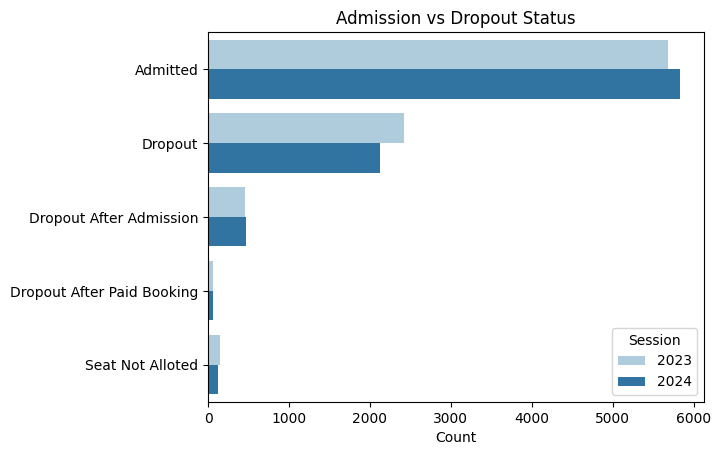

In [18]:
sns.countplot(data=df, y='Status', hue='Session', palette='Paired')
plt.title("Admission vs Dropout Status")
plt.xlabel("Count")
plt.ylabel("")
plt.show()

# 2) Time Trend Analysis

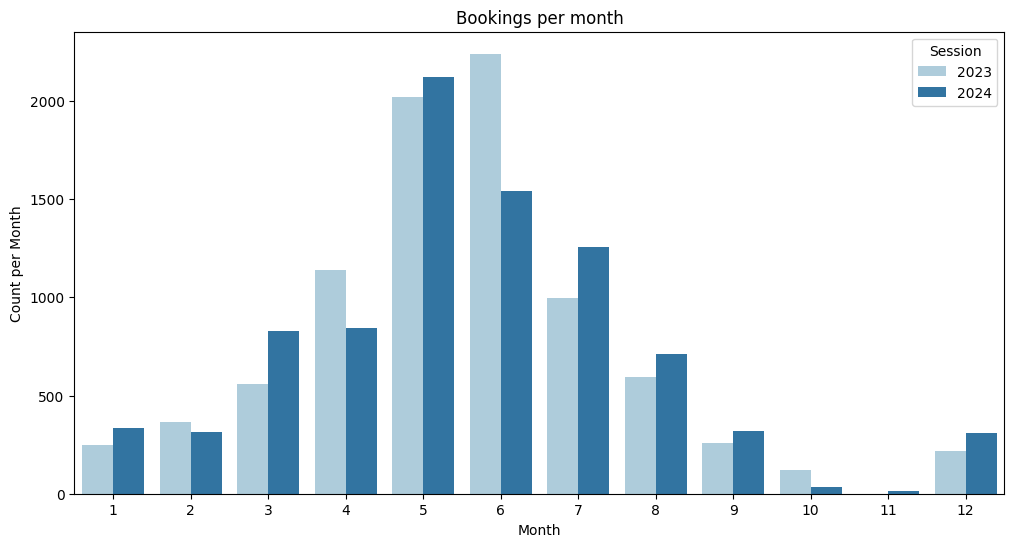

In [19]:
#Monthly bookings of 2023 vs 2024
plt.figure(figsize=(12,6))
sns.countplot(data=df, x=df['Date'].dt.month, hue='Session', palette='Paired')
plt.title("Bookings per month")
plt.xlabel("Month")
plt.ylabel("Count per Month")
plt.show()

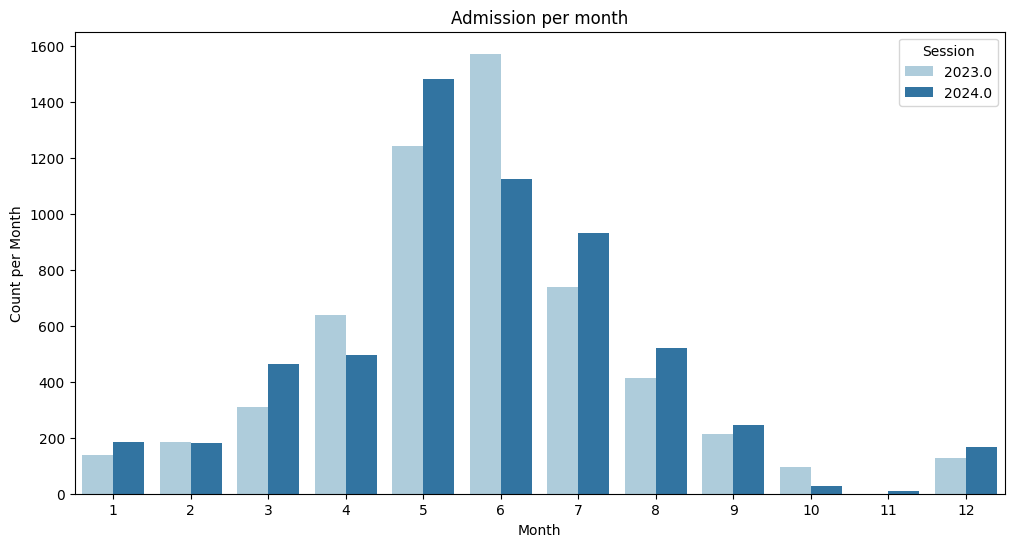

In [20]:
#Monthly Admissions of 2023 vs 2024
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Status']=='Admitted'], x=df['Date'].dt.month, hue='Session', palette='Paired')
plt.title("Admission per month")
plt.xlabel("Month")
plt.ylabel("Count per Month")
plt.show()

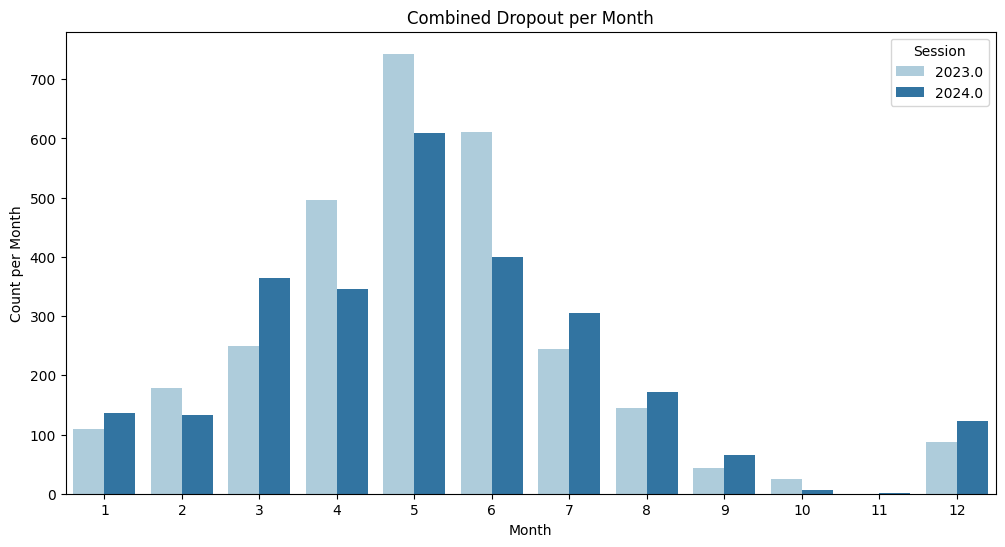

In [21]:
#Monthly Dropouts of 2023 vs 2024
plt.figure(figsize=(12,6))
data=df[(df['Status']=="Dropout") | 
            (df['Status']=="Dropout After Admission") | 
            (df['Status']=="Dropout After Paid Booking") | 
            (df['Status']=="Dropout After Paid Booking")]
sns.countplot(data=data, x=df['Date'].dt.month, hue='Session', palette='Paired')
plt.title("Combined Dropout per Month")
plt.xlabel("Month")
plt.ylabel("Count per Month")
plt.show()

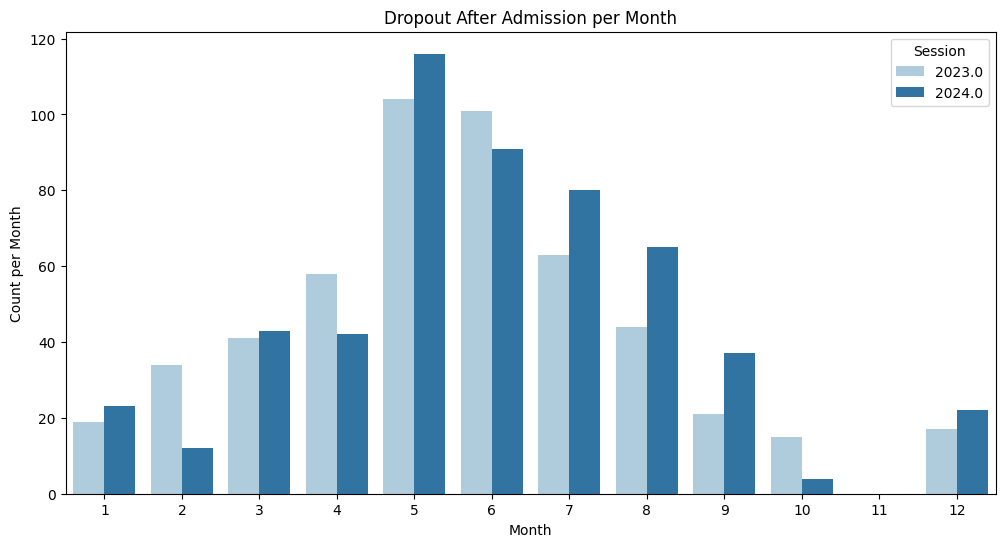

In [22]:
#Monthly Dropouts after admission of 2023 vs 2024
plt.figure(figsize=(12,6))
data=df[(df['Status']=="Dropout After Admission") | 
            (df['Status']=="Dropout After Paid Booking") | 
            (df['Status']=="Dropout After Paid Booking")]
sns.countplot(data=data, x=df['Date'].dt.month, hue='Session', palette='Paired')
plt.title("Dropout After Admission per Month")
plt.xlabel("Month")
plt.ylabel("Count per Month")
plt.show()

# 6) Student Demographics Study (only admitted)

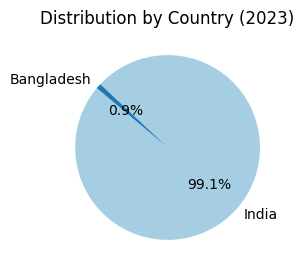

In [23]:
#Country 2023
plt.figure(figsize=(3,3))
plt.pie(
    df2023['Country'].value_counts(),
    labels=df2023['Country'].unique(),
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title("Distribution by Country (2023)")
plt.show()

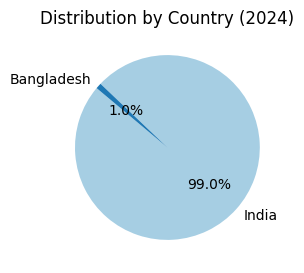

In [24]:
#Country 2024
plt.figure(figsize=(3,3))
plt.pie(
    df2024['Country'].value_counts(),
    labels=df2024['Country'].unique(),
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title("Distribution by Country (2024)")
plt.show()

         State  Count
0  West Bengal   5208
1        Bihar    139
2    Jharkhand    136
3      Tripura     67
4        Assam     19


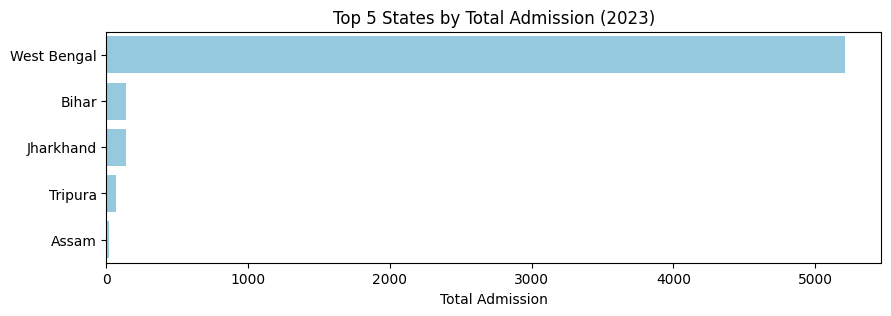

In [25]:
#States Top 10 in 2023

plt.figure(figsize=(10,3))
data=df2023[(df2023['Country']=="India") & 
            (df2023['Status']=="Admitted")]['State'].value_counts().head(5).reset_index()
data.columns = ['State', 'Count']
print(data)
sns.barplot(data=data, y='State', x='Count', color='skyblue')
plt.title("Top 5 States by Total Admission (2023)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

         State  Count
0  West Bengal   5272
1        Bihar    168
2    Jharkhand    168
3      Tripura     64
4        Assam     33


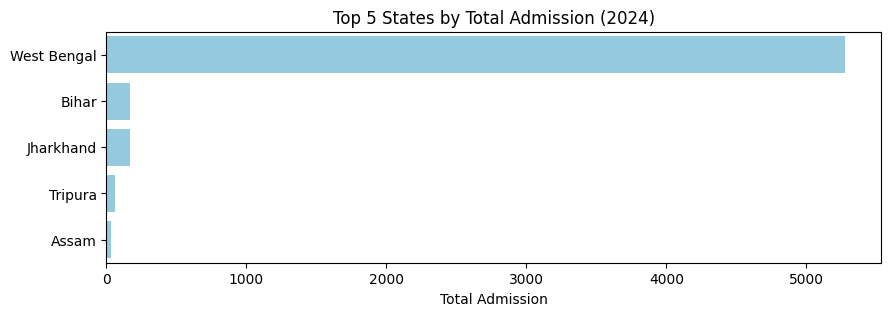

In [26]:
#States Top 10 in 2024

plt.figure(figsize=(10,3))
data=df2024[(df2024['Country']=="India") & 
            (df2024['Status']=="Admitted")]['State'].value_counts().head(5).reset_index()
data.columns = ['State', 'Count']
print(data)
sns.barplot(data=data, y='State', x='Count', color='skyblue')
plt.title("Top 5 States by Total Admission (2024)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

# 7) Course wise Analysis

                                               Course  Count
0                                             BCA (H)    749
1   B.Tech. in CSE - Artificial Intelligence & Mac...    599
2                                      B.Tech. in CSE    483
3                      BBA (H) in Hospital Management    279
4           Diploma in Computer Science & Engineering    247
5   B.Sc. (H) in Advanced Networking & Cyber Security    230
6                       B.Tech. in CSE - Data Science    227
7                 B.Sc. (H) in Animation & Multimedia    226
8                                             BBA (H)    219
9                                                 MCA    170
10                         B.Sc. (H) in Biotechnology    140
11                                                MBA    126
12                                          BBA LL.B.    118
13                                              LL.B.    109
14                                            B.Pharm     97


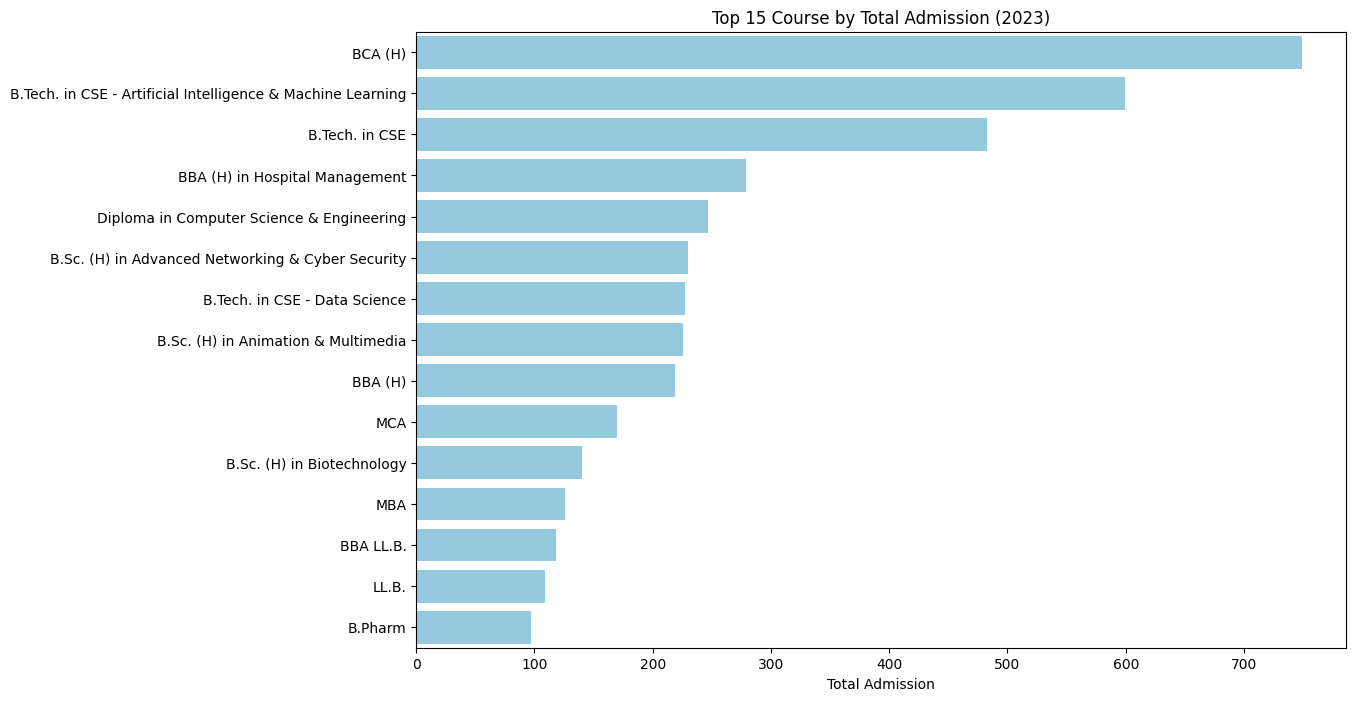

In [27]:
# Top 15 Courses for 2023
plt.figure(figsize=(12,8))
data=df2023[df2023['Status']=='Admitted']['Course'].value_counts().head(15).reset_index()
data.columns = ['Course', 'Count']
print(data)
sns.barplot(data=data, y='Course', x='Count', color='skyblue')
plt.title("Top 15 Course by Total Admission (2023)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

                                               Course  Count
0   B.Tech. in CSE - Artificial Intelligence & Mac...    643
1                                      B.Tech. in CSE    548
2                                             BCA (H)    481
3   B.Sc. (H) in Advanced Networking & Cyber Security    271
4           Diploma in Computer Science & Engineering    247
5                      BBA (H) in Hospital Management    208
6                                                 MCA    187
7                                             BBA (H)    173
8                                           BBA LL.B.    172
9                 B.Sc. (H) in Animation & Multimedia    169
10                           B.Sc. (H) in Agriculture    123
11                                                MBA    119
12                                         B.A. LL.B.    118
13                                              LL.B.    115
14                           B.Tech. in Biotechnology    107


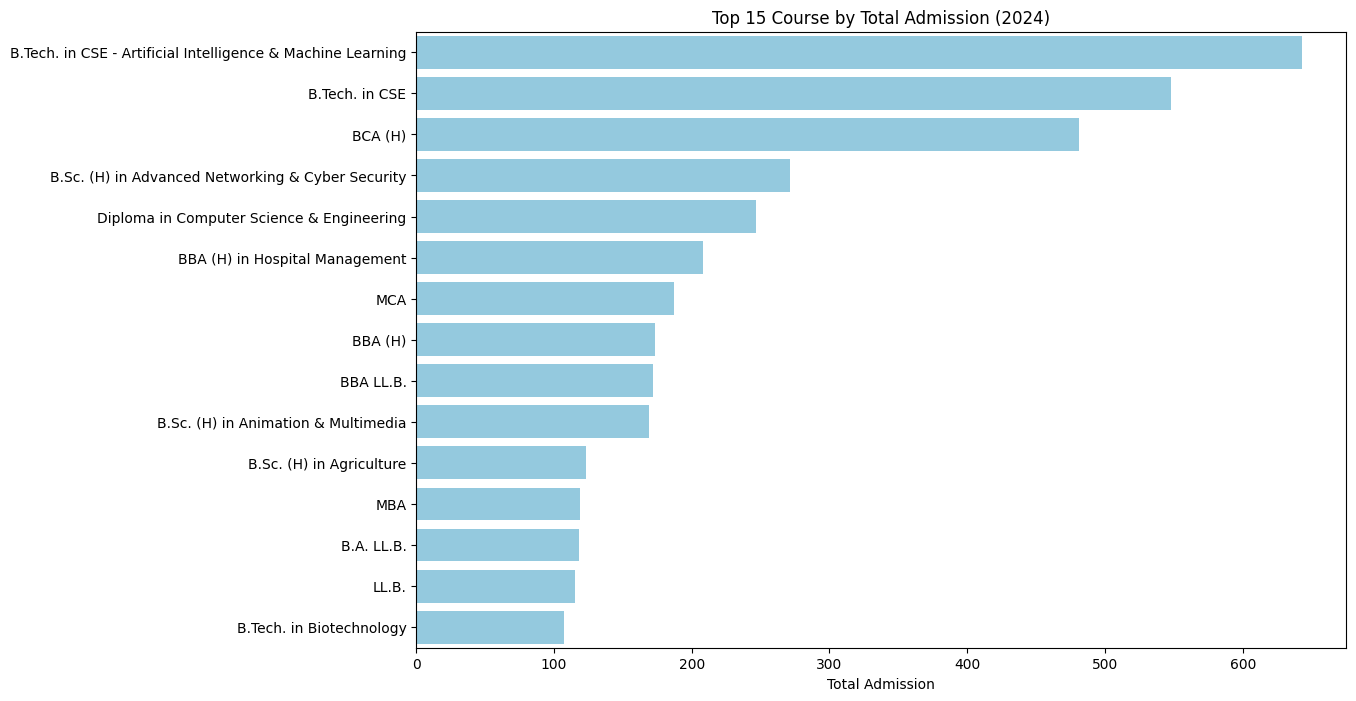

In [28]:
# Top 15 Courses for 2024
plt.figure(figsize=(12,8))
data=df2024[df2024['Status']=='Admitted']['Course'].value_counts().head(15).reset_index()
data.columns = ['Course', 'Count']
print(data)
sns.barplot(data=data, y='Course', x='Count', color='skyblue')
plt.title("Top 15 Course by Total Admission (2024)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

                                               Course  Count
0   B.Tech. in CSE - Artificial Intelligence & Mac...    296
1                                             BCA (H)    290
2                                      B.Tech. in CSE    280
3                                             BBA (H)    131
4                      BBA (H) in Hospital Management    130
5                                               LL.B.    114
6                       B.Tech. in CSE - Data Science    107
7                          B.Sc. (H) in Biotechnology     94
8                                           BBA LL.B.     75
9                            B.Sc. (H) in Agriculture     69
10  B.Sc. (H) in Advanced Networking & Cyber Security     69
11          Diploma in Computer Science & Engineering     67
12                                                MCA     64
13                                            B.Pharm     64
14                                                MBA     62


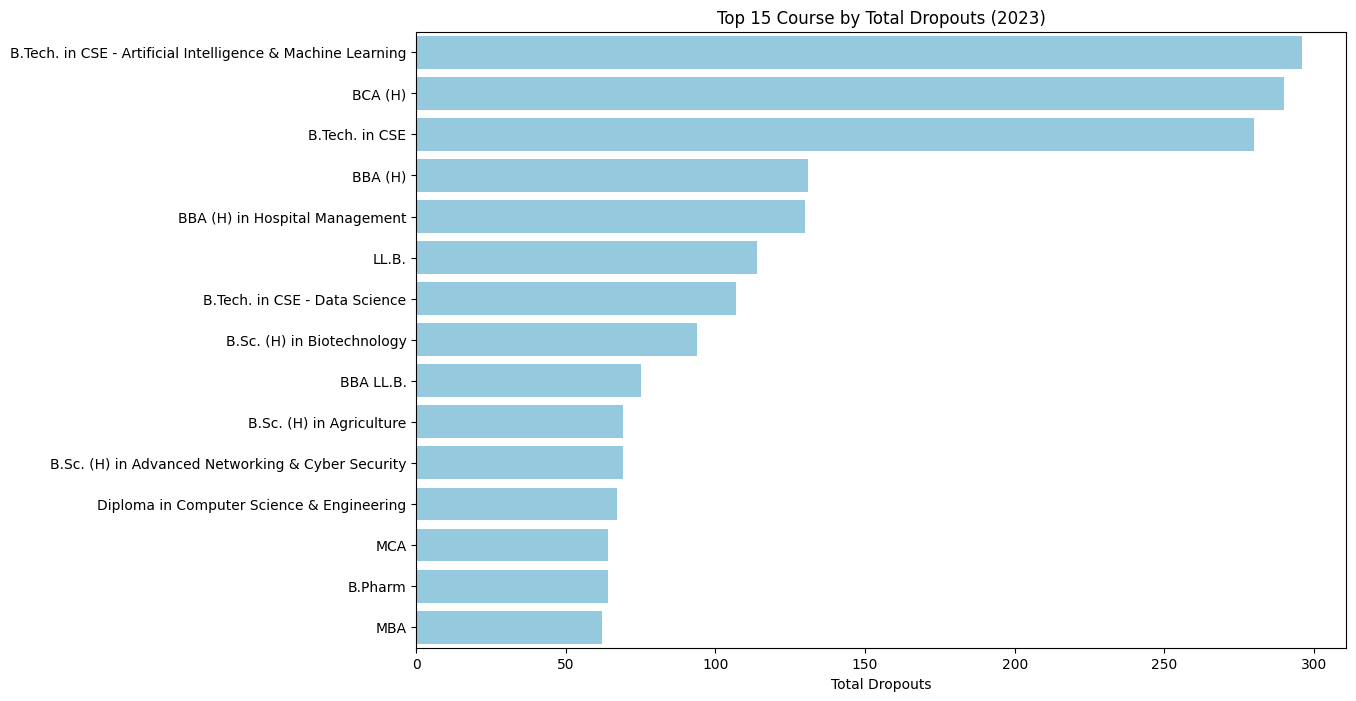

In [29]:
# Top 15 Courses with hight dropouts 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Dropout') |
            (df2023['Status']=='Dropout After Admission')|
            (df2023['Status']=='Dropout After Paid Booking')]['Course'].value_counts().head(15).reset_index()
data.columns = ['Course', 'Count']
print(data)
sns.barplot(data=data, y='Course', x='Count', color='skyblue')
plt.title("Top 15 Course by Total Dropouts (2023)")
plt.xlabel("Total Dropouts")
plt.ylabel("")
plt.show()

                                               Course  Count
0                                      B.Tech. in CSE    299
1   B.Tech. in CSE - Artificial Intelligence & Mac...    283
2                                             BCA (H)    178
3                                             BBA (H)    100
4                      BBA (H) in Hospital Management     83
5                                           BBA LL.B.     74
6   B.Sc. (H) in Advanced Networking & Cyber Security     73
7           Diploma in Computer Science & Engineering     71
8                                               LL.B.     68
9                                             B.Pharm     61
10                B.Sc. (H) in Animation & Multimedia     59
11                         B.Sc. (H) in Biotechnology     59
12                           B.Sc. (H) in Agriculture     59
13                                         B.A. LL.B.     56
14                                                MCA     56


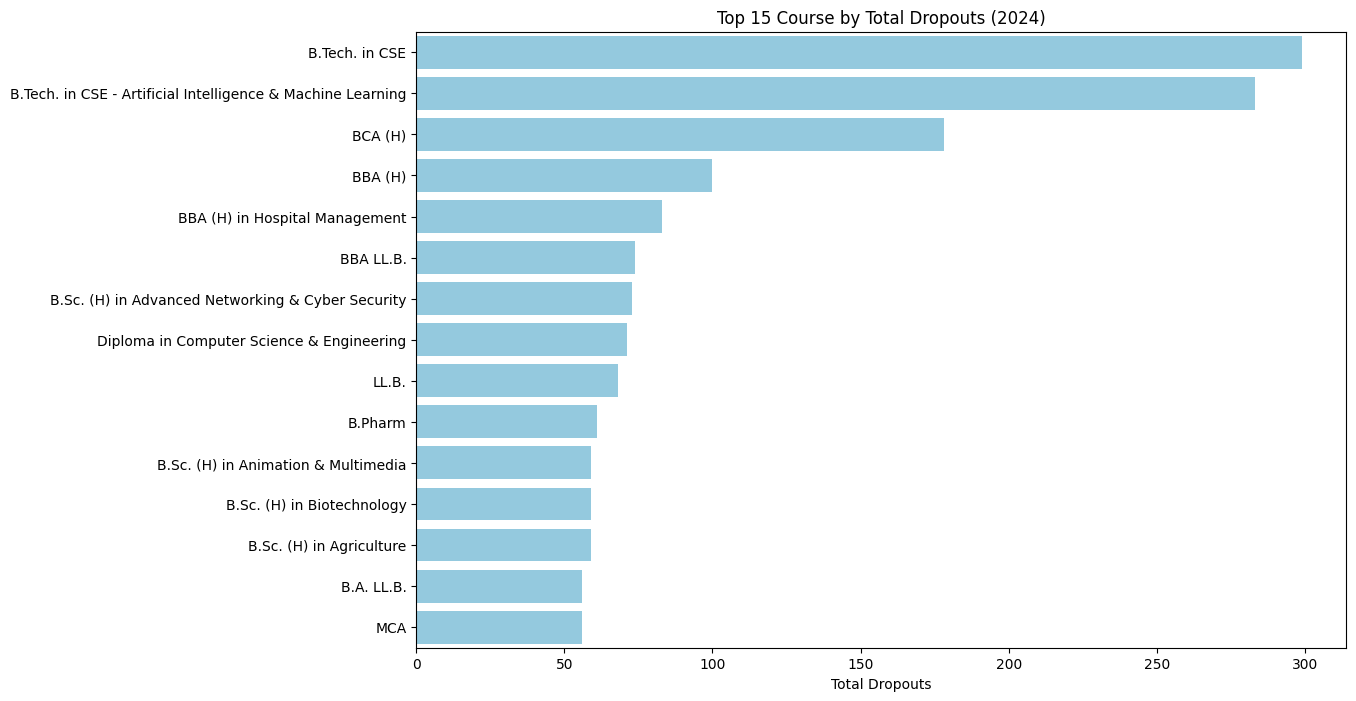

In [30]:
# Top 15 Courses with hight dropouts 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Dropout') |
            (df2024['Status']=='Dropout After Admission')|
            (df2024['Status']=='Dropout After Paid Booking')]['Course'].value_counts().head(15).reset_index()
data.columns = ['Course', 'Count']
print(data)
sns.barplot(data=data, y='Course', x='Count', color='skyblue')
plt.title("Top 15 Course by Total Dropouts (2024)")
plt.xlabel("Total Dropouts")
plt.ylabel("")
plt.show()

# Admission Sources Analysis

                    Source  Count
0                    Agent   2455
1   Digital Marketing Call   1386
2   Digital Marketing Lead    442
3       Student Ambassador    330
4             Data Calling    122
5  Agent (No Disbursement)    116
6      Internal Conversion    111
7        Student reference     96
8             Campus Visit     92
9         collegedekho.com     81


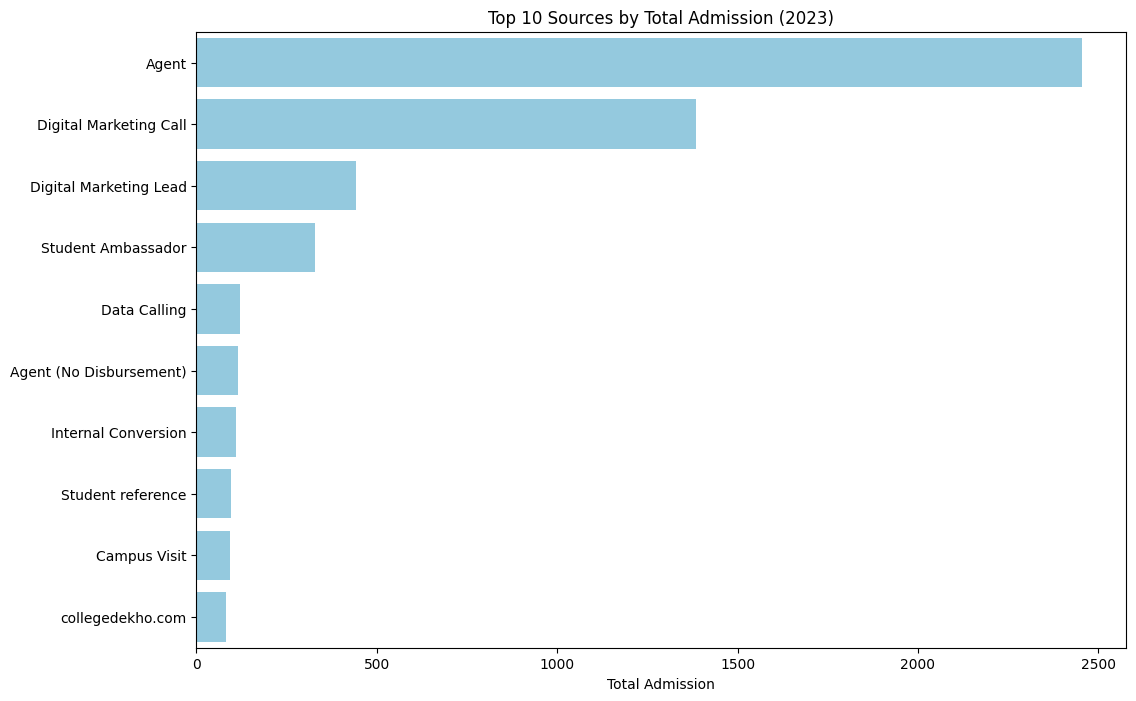

In [31]:
#Top 10 Sources of Admissions in 2023
plt.figure(figsize=(12,8))
data=df2023[df2023['Status']=='Admitted']['Source'].value_counts().head(10).reset_index()
data.columns = ['Source', 'Count']
print(data)
sns.barplot(data=data, y='Source', x='Count', color='skyblue')
plt.title("Top 10 Sources by Total Admission (2023)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

                    Source  Count
0                    Agent   2230
1   Digital Marketing Call   1249
2       Student Ambassador    692
3   Digital Marketing Lead    533
4      Internal Conversion    238
5  Agent (No Disbursement)    113
6             Data Calling    111
7             Campus Visit    104
8        Student reference    101
9              Shiksha.com     96


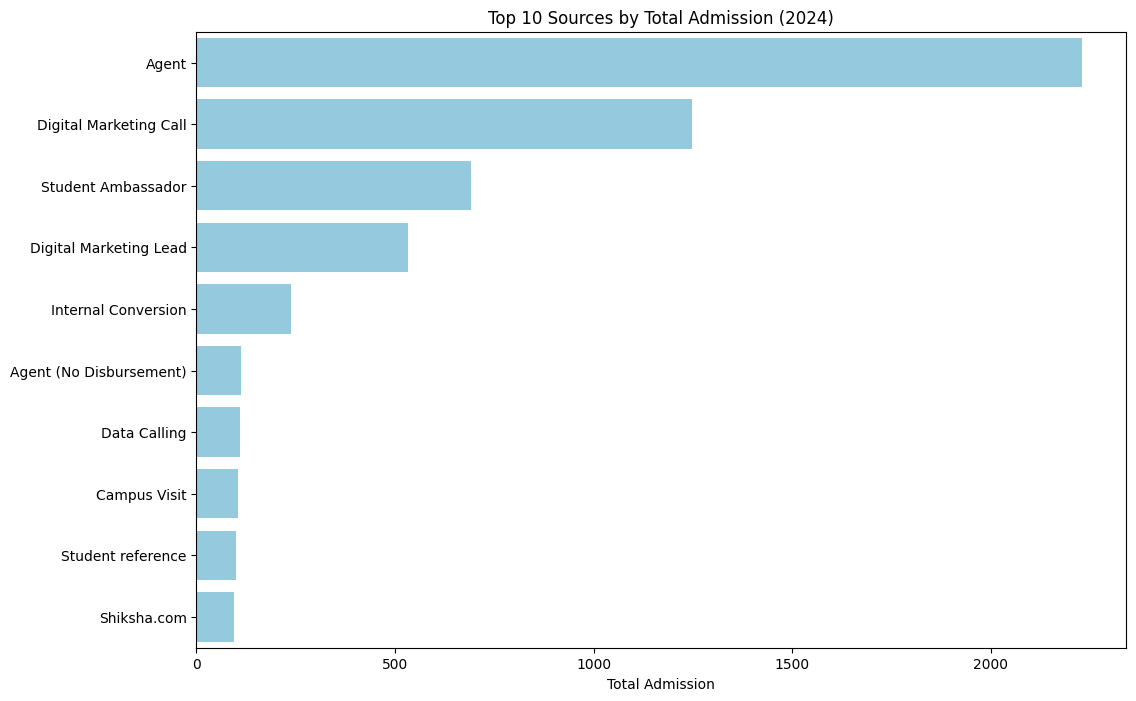

In [32]:
#Top 10 Sources of Admissions in 2024
plt.figure(figsize=(12,8))
data=df2024[df2024['Status']=='Admitted']['Source'].value_counts().head(10).reset_index()
data.columns = ['Source', 'Count']
print(data)
sns.barplot(data=data, y='Source', x='Count', color='skyblue')
plt.title("Top 10 Sources by Total Admission (2024)")
plt.xlabel("Total Admission")
plt.ylabel("")
plt.show()

                     Source  Count
0                     Agent   1196
1    Digital Marketing Call    722
2    Digital Marketing Lead    270
3   Agent (No Disbursement)    105
4        Student Ambassador    104
5          collegedekho.com     83
6         Student reference     65
7              Data Calling     62
8          collegedunia.com     57
9              Campus Visit     42
10      Internal Conversion     41
11              Shiksha.com     34
12           Agent (Centre)     31
13       Personal reference     23
14         Internal Student     19


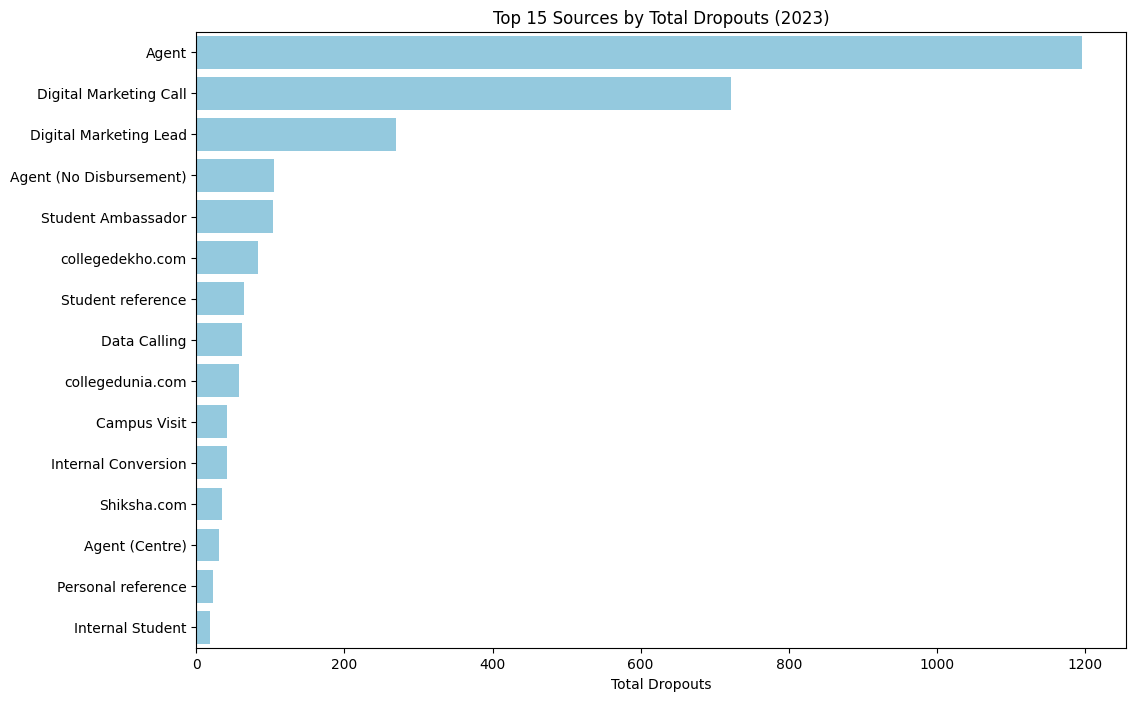

In [33]:
# Top 10 Sources of Dropouts in 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Dropout') |
            (df2023['Status']=='Dropout After Admission')|
            (df2023['Status']=='Dropout After Paid Booking')]['Source'].value_counts().head(15).reset_index()
data.columns = ['Source', 'Count']
print(data)
sns.barplot(data=data, y='Source', x='Count', color='skyblue')
plt.title("Top 15 Sources by Total Dropouts (2023)")
plt.xlabel("Total Dropouts")
plt.ylabel("")
plt.show()

                     Source  Count
0                     Agent    996
1    Digital Marketing Call    628
2    Digital Marketing Lead    290
3        Student Ambassador    222
4   Agent (No Disbursement)     68
5               Shiksha.com     62
6          collegedekho.com     62
7       Internal Conversion     58
8              Campus Visit     56
9         Student reference     50
10             Data Calling     48
11       Marketing Activity     22
12         collegedunia.com     20
13       Personal reference     11
14         Paper Advt (ABP)     11


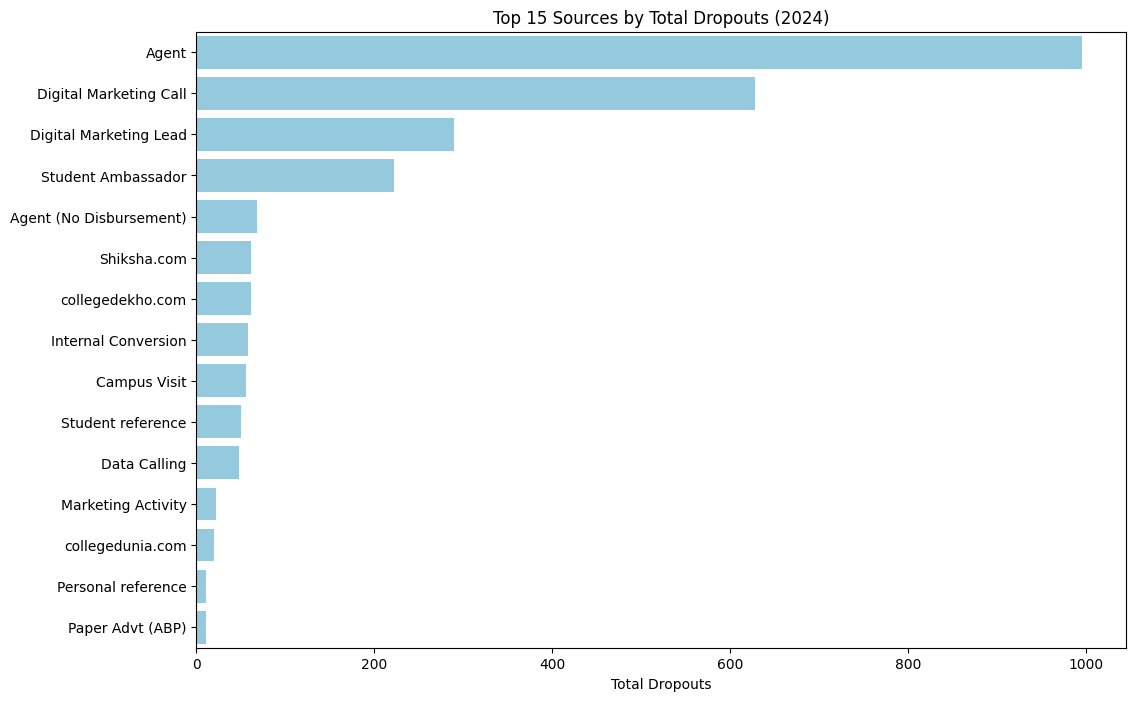

In [34]:
# Top 10 Sources of Dropouts in 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Dropout') |
            (df2024['Status']=='Dropout After Admission')|
            (df2024['Status']=='Dropout After Paid Booking')]['Source'].value_counts().head(15).reset_index()
data.columns = ['Source', 'Count']
print(data)
sns.barplot(data=data, y='Source', x='Count', color='skyblue')
plt.title("Top 15 Sources by Total Dropouts (2024)")
plt.xlabel("Total Dropouts")
plt.ylabel("")
plt.show()

                               Agent  Count
0                  Debarati Majumder     88
1   Techno Soft (Brainware Baguiati)     45
2                        SUKANTA DAS     42
3                  SUDIP CHANDRA DEY     40
4                     KRISHNENDU ROY     39
5                       SAHAJAMAL SK     39
6                       Soma Samanta     38
7                  RAHUL CHAKRABORTY     35
8                        Mrinmoy Das     34
9              Somnath Roy Choudhury     31
10                      Sukumar Bera     30
11              Kalyan Bhattacharjee     27
12                       ARNAB BASAK     27
13                 MITA DUTTA HALDER     26
14                  Arup Kumar Dutta     25


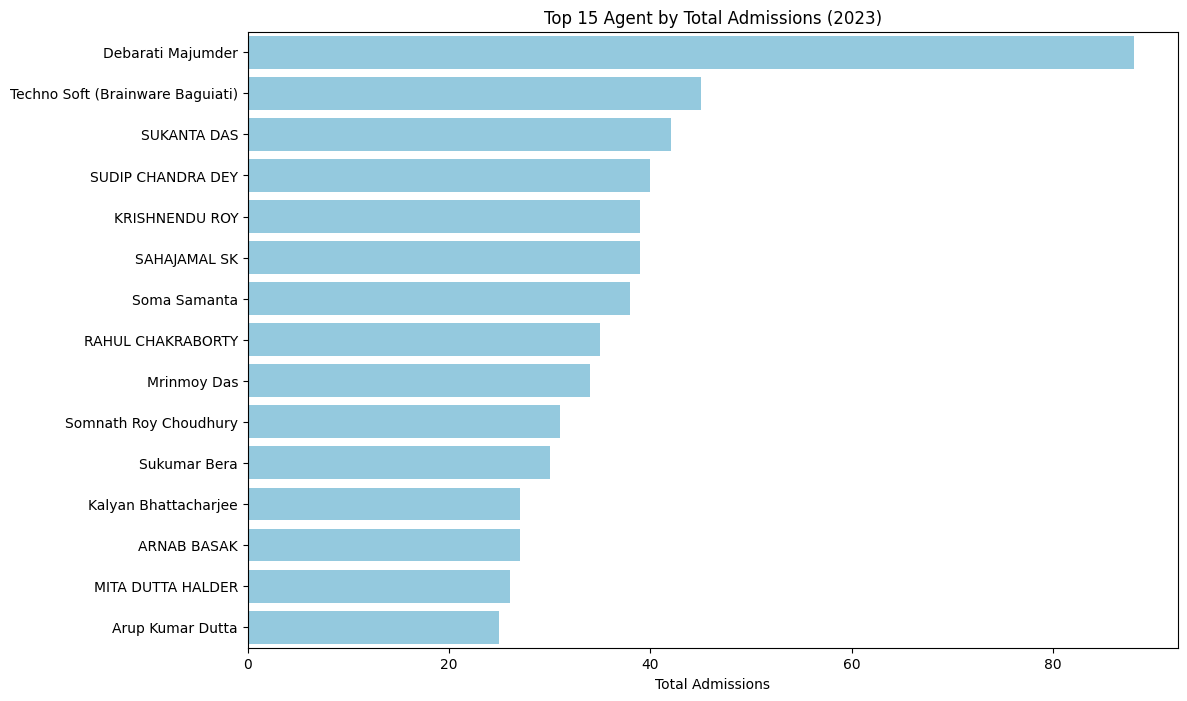

In [35]:
# Top 10 Agnets of Admission in 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Admitted') |
            (df2023['Source']=='Agent')]['Agent'].value_counts().head(15).reset_index()
data.columns = ['Agent', 'Count']
print(data)
sns.barplot(data=data, y='Agent', x='Count', color='skyblue')
plt.title("Top 15 Agent by Total Admissions (2023)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

                             Agent  Count
0                Debarati Majumder     54
1                      SUKANTA DAS     50
2                      Mrinmoy Das     45
3                      Kesha Gupta     43
4                 Arup Kumar Dutta     40
5                DIBYENDU KARMAKAR     39
6                   KRISHNENDU ROY     36
7                  Sumita Majumder     33
8                   SAJAL KARMAKAR     33
9                  SHAHID ALI KHAN     33
10                    Sabina Molla     32
11                DHANANJAY PRASAD     32
12              RUPASHREE ADHIKARY     28
13                   Santanu Kayal     27
14  ABP Academy (Brainware Bagnan)     27


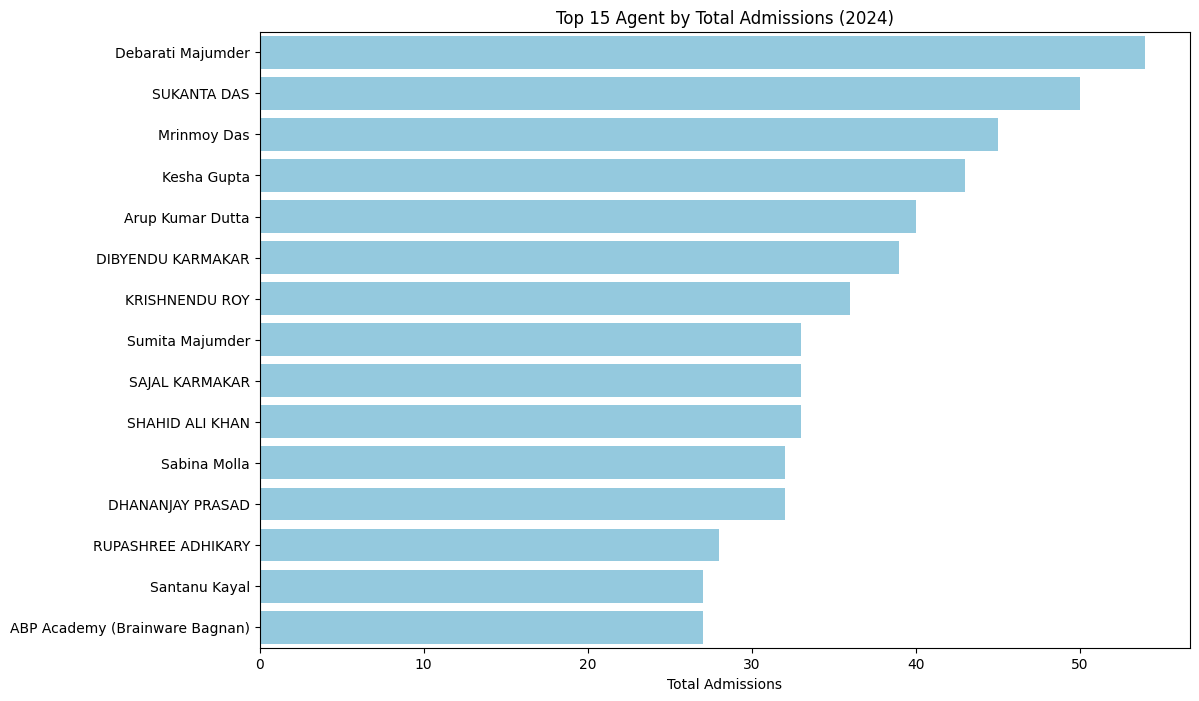

In [36]:
# Top 10 Agnets of Admission in 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Admitted') |
            (df2024['Source']=='Agent')]['Agent'].value_counts().head(15).reset_index()
data.columns = ['Agent', 'Count']
print(data)
sns.barplot(data=data, y='Agent', x='Count', color='skyblue')
plt.title("Top 15 Agent by Total Admissions (2024)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

# 9) Group wise Analysis

                  Group  Count
0           Campus Desk    777
1          Biswarup Das    753
2        Srimanta Ghosh    474
3       Subhasis Chanda    442
4       Sudeshna Sarkar    407
5   Kaushik Chakraborty    381
6  Franchisee Operation    358
7           Mousumi Roy    258
8          Nilanjan Das    255
9     Krishanu Banerjee    247


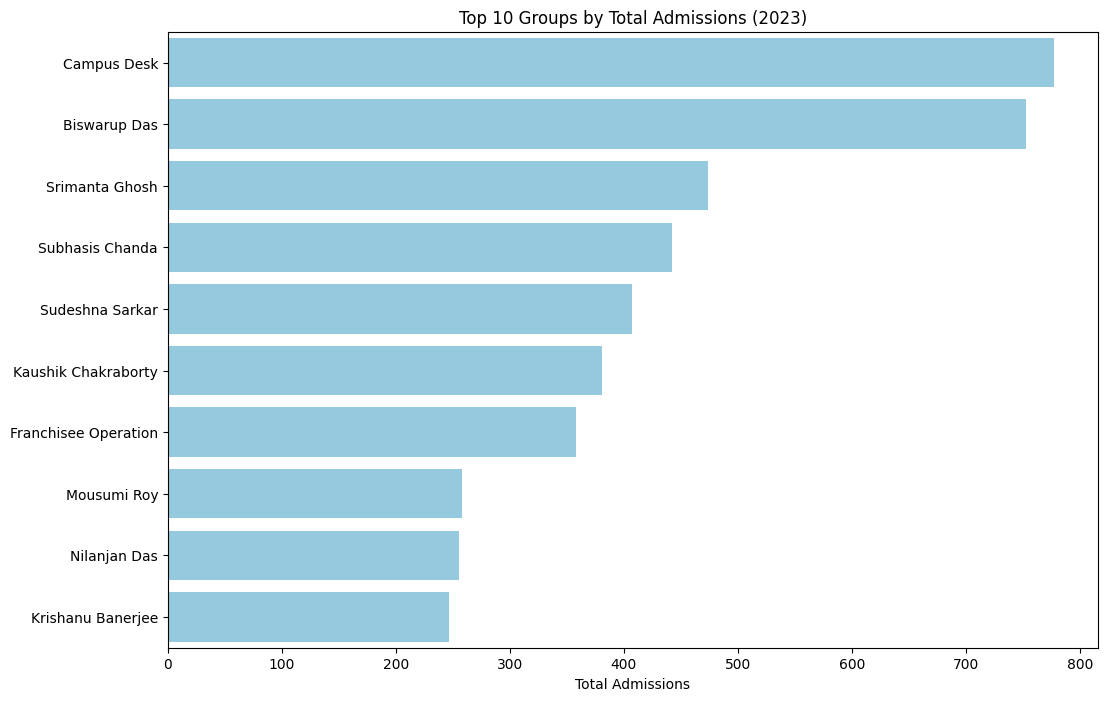

In [37]:
#Top 10 Groups of 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Admitted')]['Group'].value_counts().head(10).reset_index()
data.columns = ['Group', 'Count']
print(data)
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
plt.title("Top 10 Groups by Total Admissions (2023)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

                  Group  Count
0           Campus Desk    758
1          Biswarup Das    671
2        Srimanta Ghosh    543
3       Subhasis Chanda    514
4       Sudeshna Sarkar    409
5  Franchisee Operation    402
6   Kaushik Chakraborty    349
7           Mousumi Roy    291
8          Nilanjan Das    265
9     Krishanu Banerjee    246


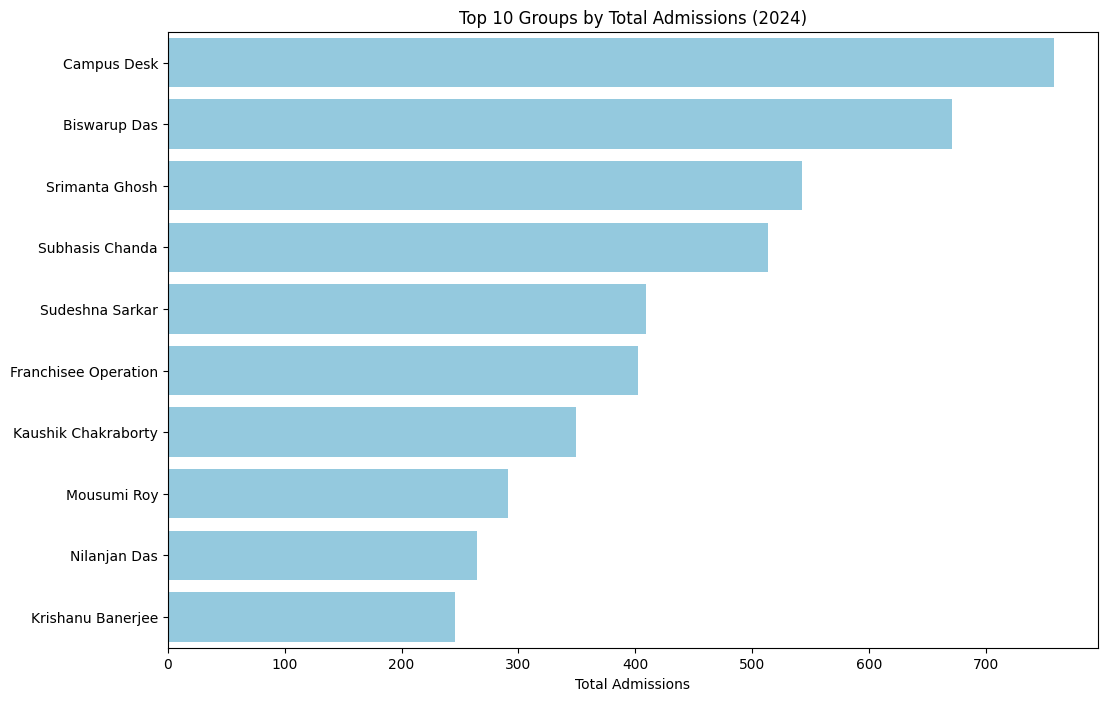

In [38]:
#Top 10 Groups of 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Admitted')]['Group'].value_counts().head(10).reset_index()
data.columns = ['Group', 'Count']
print(data)
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
plt.title("Top 10 Groups by Total Admissions (2024)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

               Group  Count
0  Debasis Mukherjee    202
1       Rajib Bhuiya    177
2        Sujit Ghosh    174
3     Kalyan Ghoshal    174
4      Kausik Sasmal    157
5           Sajal De    141
6      Shantanu Dhar    134
7      Banibrata Pal     70
8       Manojit Saha     60
9         Amrita Sen     37


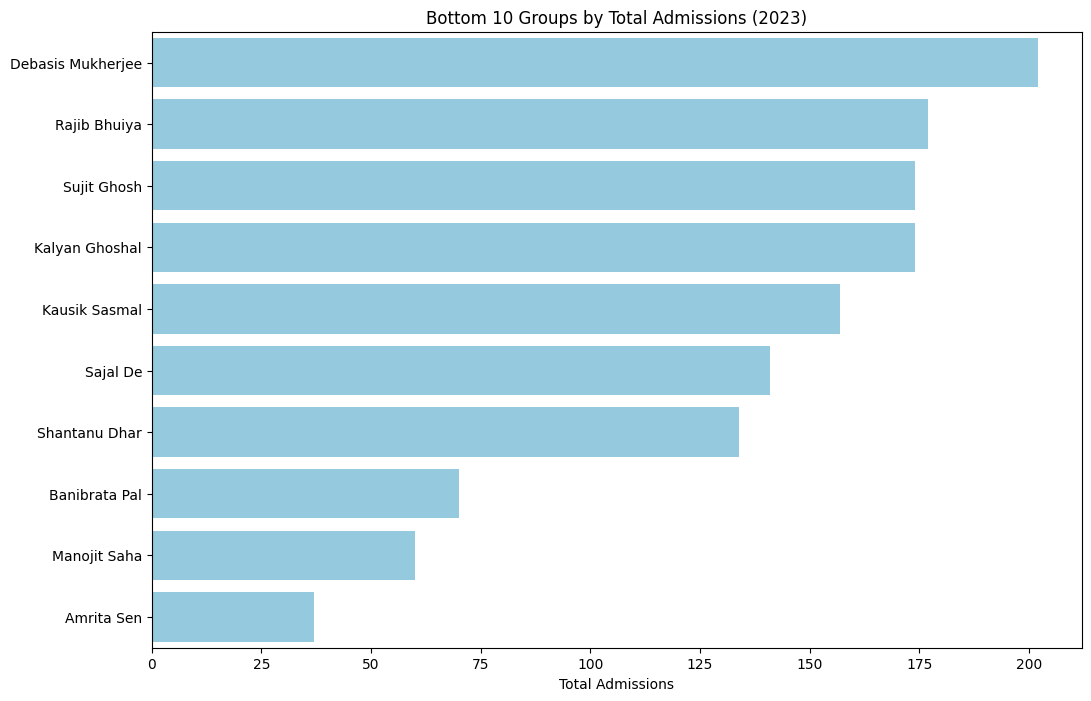

In [44]:
# Top 5 groups with least admission 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Admitted')]['Group'].value_counts().tail(10).reset_index()
data.columns = ['Group', 'Count']
print(data)
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
plt.title("Bottom 10 Groups by Total Admissions (2023)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

               Group  Count
0  Debasis Mukherjee    188
1       Rajib Bhuiya    180
2        Sujit Ghosh    156
3      Kausik Sasmal    151
4     Kalyan Ghoshal    135
5      Shantanu Dhar    114
6         Amrita Sen    111
7       Manojit Saha     81
8      Banibrata Pal     77
9    Admission Clash      1


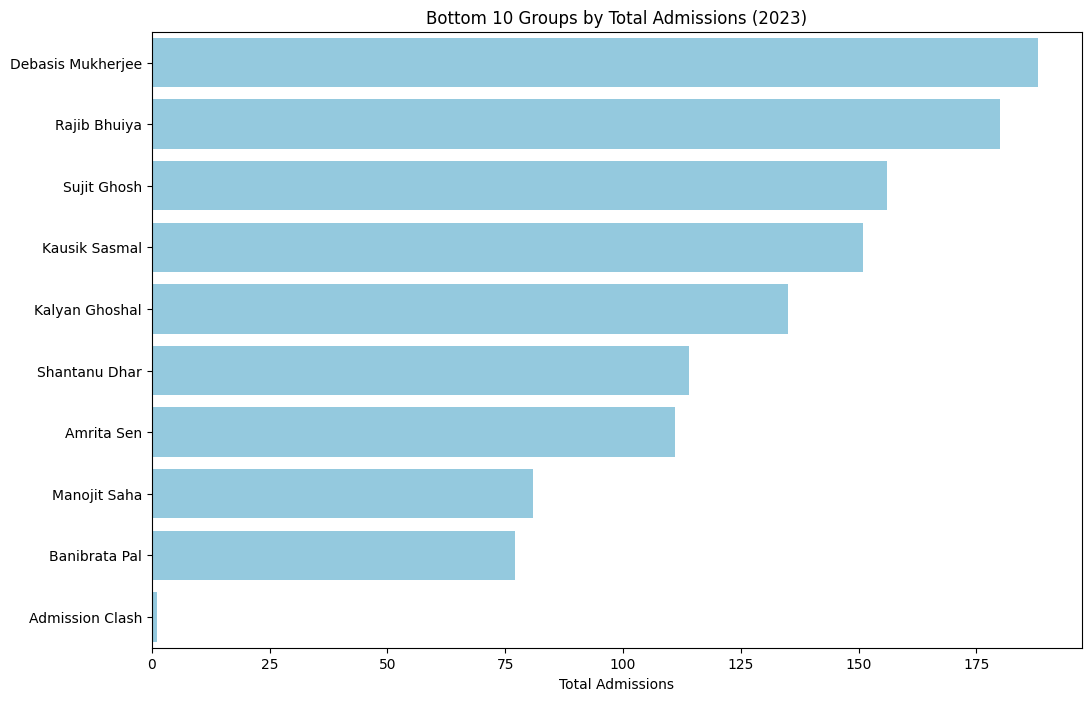

In [43]:
# Top 5 groups with least admission 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Admitted')]['Group'].value_counts().tail(10).reset_index()
data.columns = ['Group', 'Count']
print(data)
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
plt.title("Bottom 10 Groups by Total Admissions (2023)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

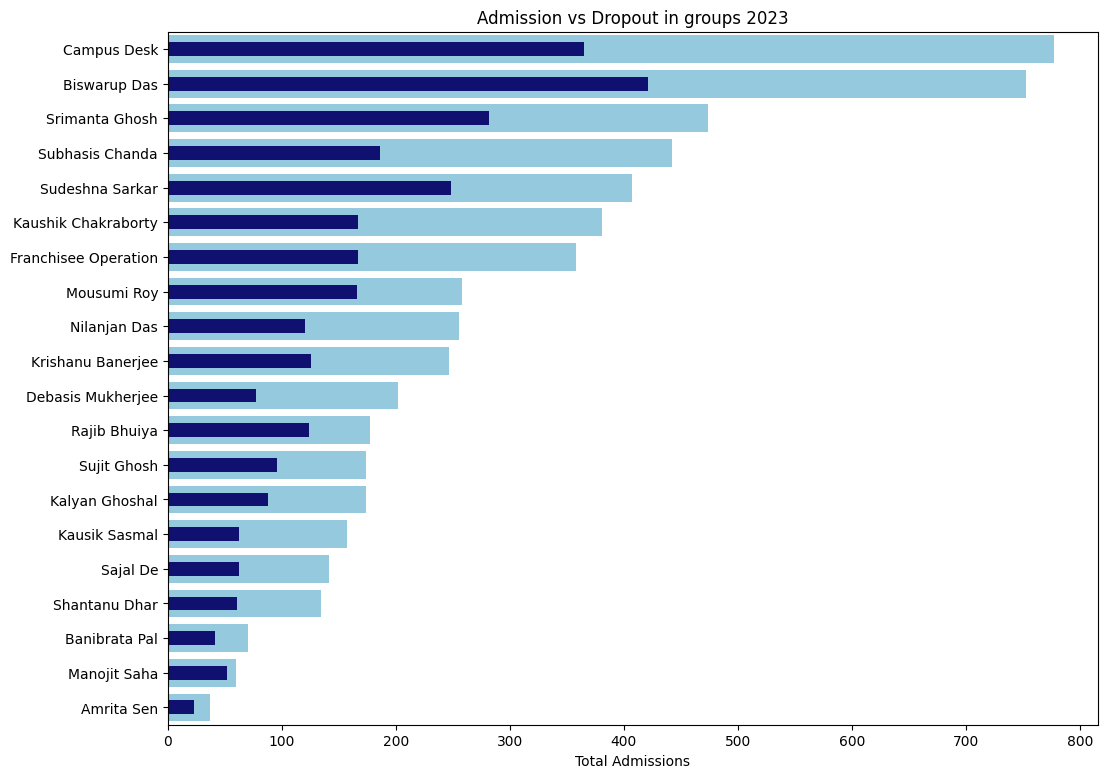

In [41]:
# Admission vs Dropout in groups 2023
plt.figure(figsize=(12,9))
data=df2023[(df2023['Status']=='Admitted')]['Group'].value_counts().reset_index()
data2=df2023[(df2023['Status']=='Dropout') |
            (df2023['Status']=='Dropout After Admission')|
            (df2023['Status']=='Dropout After Paid Booking')]['Group'].value_counts().reset_index()
data.columns = ['Group', 'Count']
data2.columns = ['Group', 'Count']
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
sns.barplot(data=data2, y='Group', x='Count', color='navy', width=0.4)
plt.title("Admission vs Dropout in groups 2023")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

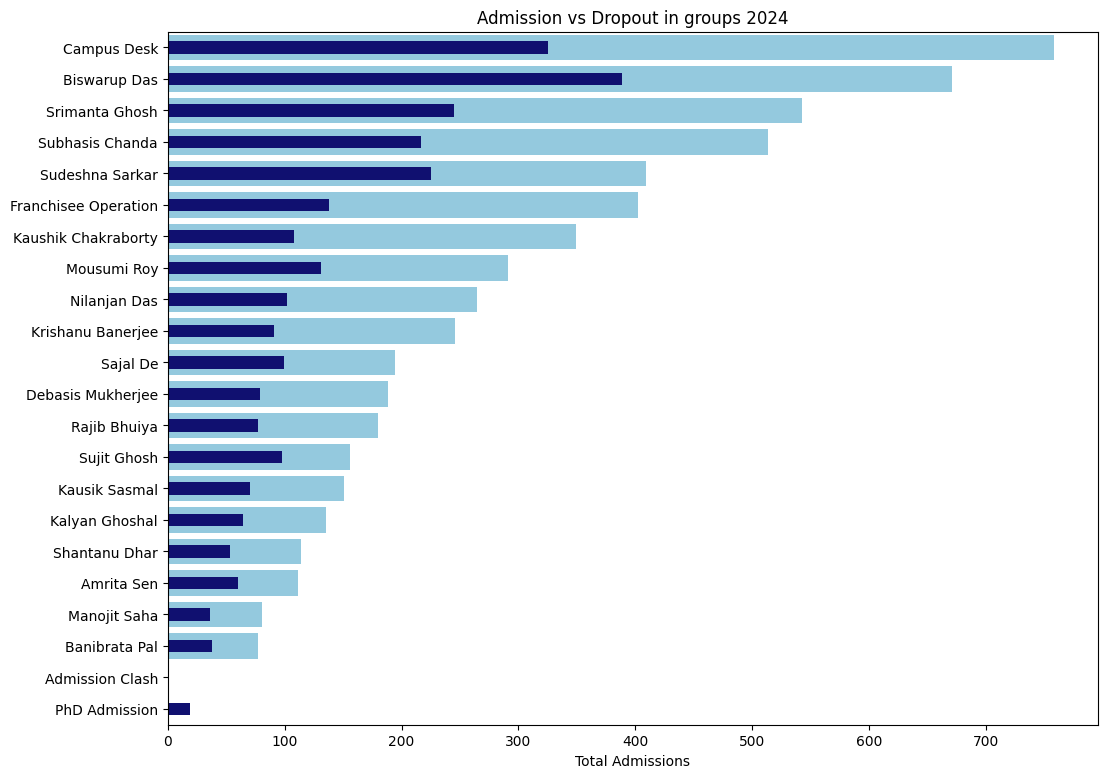

In [42]:
# Admission vs Dropout in groups 2024
plt.figure(figsize=(12,9))
data=df2024[(df2024['Status']=='Admitted')]['Group'].value_counts().reset_index()
data2=df2024[(df2024['Status']=='Dropout') |
            (df2024['Status']=='Dropout After Admission')|
            (df2024['Status']=='Dropout After Paid Booking')]['Group'].value_counts().reset_index()
data.columns = ['Group', 'Count']
data2.columns = ['Group', 'Count']
sns.barplot(data=data, y='Group', x='Count', color='skyblue')
sns.barplot(data=data2, y='Group', x='Count', color='navy', width=0.4)
plt.title("Admission vs Dropout in groups 2024")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

                  RP  Count
0           Soma Das    219
1       Biswarup Das    183
2   Madona Chowdhury    163
3    Mousikta Sarkar    158
4  Sankalan Karmakar    153
5       Susmita Saha    143
6         Ankita Das    137
7  Krishanu Banerjee    131
8  Debashree Choubey    131
9       Jayanta Paul    119


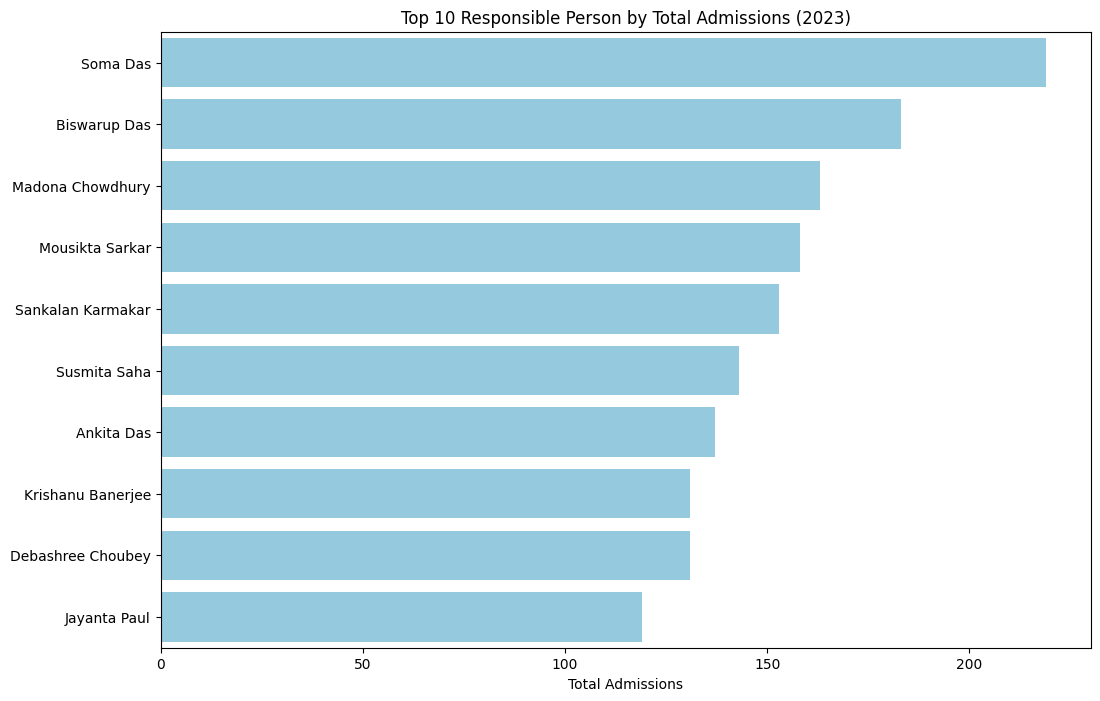

In [45]:
#Top 10 Responsible persons 2023
plt.figure(figsize=(12,8))
data=df2023[(df2023['Status']=='Admitted')]['RP'].value_counts().head(10).reset_index()
data.columns = ['RP', 'Count']
print(data)
sns.barplot(data=data, y='RP', x='Count', color='skyblue')
plt.title("Top 10 Responsible Person by Total Admissions (2023)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()

                        RP  Count
0             Susmita Saha    212
1               Ankita Das    209
2         Madona Chowdhury    178
3        Debashree Choubey    175
4          Mousikta Sarkar    169
5                 Soma Das    156
6        Sankalan Karmakar    144
7               Tanuja Rej    129
8  Angshuman Bhattacharjee    123
9          Debabrata Routh    121


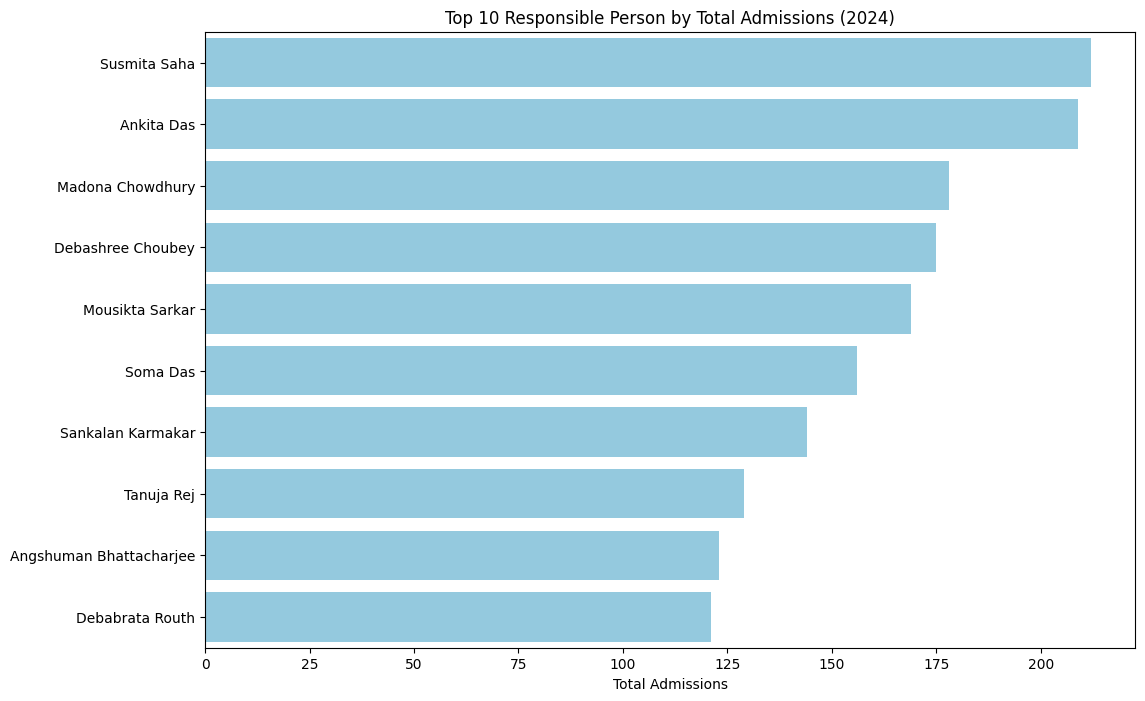

In [46]:
#Top 10 Responsible persons 2024
plt.figure(figsize=(12,8))
data=df2024[(df2024['Status']=='Admitted')]['RP'].value_counts().head(10).reset_index()
data.columns = ['RP', 'Count']
print(data)
sns.barplot(data=data, y='RP', x='Count', color='skyblue')
plt.title("Top 10 Responsible Person by Total Admissions (2024)")
plt.xlabel("Total Admissions")
plt.ylabel("")
plt.show()